In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
## models
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [5]:
data = pd.read_csv("winequality-red.csv", sep = ";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
780,7.0,0.57,0.00,2.0,0.190,12.0,45.0,0.99676,3.31,0.60,9.4,6
1127,6.3,0.76,0.00,2.9,0.072,26.0,52.0,0.99379,3.51,0.60,11.5,6
952,8.2,0.31,0.40,2.2,0.058,6.0,10.0,0.99536,3.31,0.68,11.2,7
1111,5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7
1331,7.8,0.87,0.26,3.8,0.107,31.0,67.0,0.99668,3.26,0.46,9.2,5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

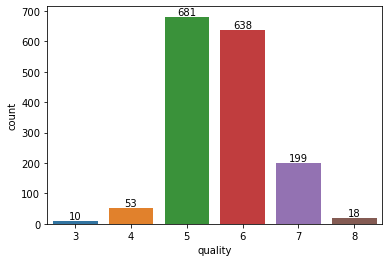

In [12]:
ax = sbn.countplot(x = data["quality"])
ax.bar_label(ax.containers[0]);

In [13]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [14]:
data.corr()["quality"]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [15]:
y = data["quality"]
x = data.drop("quality", axis = 1)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [49]:
def classification(x, y):
    g = GaussianNB()
    b = BernoulliNB()
    dt = DecisionTreeClassifier(criterion = "gini")   # "gini", "entropy", "log_loss"
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    kn = KNeighborsClassifier()
    sv = SVC(kernel = "rbf")   # 'linear', 'poly', 'rbf', 'sigmoid'
    
    models = [g, b, dt, rf, gb, kn, sv]
    model_names = ["Gaussian", "Bernoulli", "Decision_Tree", "Random_Forest", "Gradient_Boost", "KNN", "Support_Vector"]
    
    sonuc_df = pd.DataFrame(columns = ["Accuracy_Score"], index = model_names)
    acc = []
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 42)
    scale1 = StandardScaler()
    scale2 = MinMaxScaler()
    x_train = scale1.fit_transform(x_train)
    x_test = scale1.fit_transform(x_test)
    ## x_train = scale2.fit_transform(x_train)
    ## x_test = scale2.fit_transform(x_test)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc.append(accuracy_score(y_true, y_pred))
        
    sonuc_df["Accuracy_Score"] = acc
    return sonuc_df.sort_values("Accuracy_Score", ascending = False)

In [50]:
classification(x, y)

,Accuracy_Score
Random_Forest,0.616667
Support_Vector,0.566667
Gradient_Boost,0.552083
KNN,0.535417
Gaussian,0.502083
Decision_Tree,0.458333
Bernoulli,0.422917


In [36]:
## i want to best score for Decision tree so;(nothing changed)
max_value = 0
count = 1
liste = []
    
for j in range(1,10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
    new_model2 = KNeighborsClassifier(n_neighbors = i)
    new_model2.fit(x_train, y_train)
    score = new_model2.score(x_test, y_test) * 100
    print(f"for random_state {j} :  score : {new_model2.score(x_test, y_test) * 100}")
    liste.append(score)

for random_state 1 :  score : 52.5
for random_state 2 :  score : 52.5
for random_state 3 :  score : 52.5
for random_state 4 :  score : 52.5
for random_state 5 :  score : 52.5
for random_state 6 :  score : 52.5
for random_state 7 :  score : 52.5
for random_state 8 :  score : 52.5
for random_state 9 :  score : 52.5


In [34]:
liste

[52.5, 52.5, 52.5, 52.5, 52.5, 52.5, 52.5, 52.5, 52.5]

## ilk dataset için başarı oranımız çok kötü şimdi ikincisi için deneyeceğim.

In [52]:
data2 = pd.read_csv("winequality-white.csv", sep = ";")
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [53]:
data2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [54]:
y2 = data2["quality"]
x2 = data2.drop("quality", axis = 1)

In [55]:
classification(x2, y2)

,Accuracy_Score
Support_Vector,0.512245
Random_Forest,0.487755
KNN,0.461224
Bernoulli,0.454422
Gradient_Boost,0.442857
Gaussian,0.434694
Decision_Tree,0.373469


## Başarı oranları çok kötü bu sefer